In [84]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
import cv2

## Color Detection using Kmeans

In [85]:
def get_image(image_path):
    """
    Read an image from the specified file path and convert its color space from BGR to RGB.

    :param image_path: str
        The file path to the image.

    :return: numpy.ndarray
        The image array with RGB color channels.
    """
    # Read the image from the specified path
    image = cv2.imread(image_path)
    
    # It convert the color space of the image from BGR (default in OpenCV) to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image


In [86]:
def RGB2HEX(color):
    """
    Convert RGB color representation to hexadecimal color code.
    :param color: A tuple containing the RGB values
    :return: The hexadecimal representation of the color
    """

    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [87]:
image = get_image('/home/ishwor/Pictures/Screenshots/Screenshot from 2024-02-26 15-51-26.png')
number_of_colors = 4
modified_image = image.reshape(image.shape[0] * image.shape[1], 3)
clf = KMeans(n_clusters=number_of_colors)
labels = clf.fit_predict(modified_image)

In [88]:
counts = Counter(labels)
center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

([<matplotlib.patches.Wedge at 0x7fc3cada5210>,
 [Text(0.8600761385900594, 0.6857616465128487, '#a9b2b5'),
  Text(-1.0112431292327289, 0.43288258636678695, '#5f716e'),
  Text(0.13237936874897827, -1.0920053583795375, '#24282d'),
  Text(1.0245294089969614, -0.4004241377593728, '#d8dbde')])

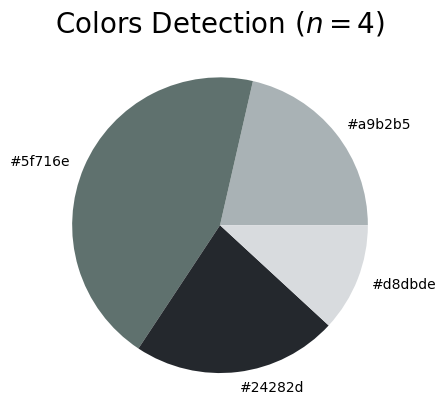

In [89]:
plt.title('Colors Detection ($n=4$)', fontsize=20)
plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)

## Color detection using hsv and color bitwise

In [90]:
def filter_colors(image, lower_bound, upper_bound):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
    filtered_image = cv2.bitwise_and(image, image, mask=mask)
    return filtered_image

In [91]:
# Define lower and upper bounds for red, orange, black, and green
red_lower = np.array([0, 100, 100])
red_upper = np.array([10, 255, 255])

orange_lower = np.array([11, 100, 100])
orange_upper = np.array([25, 255, 255])

black_lower = np.array([0, 0, 0])
black_upper = np.array([180, 255, 30])

green_lower = np.array([35, 100, 100])
green_upper = np.array([85, 255, 255])


In [93]:
image_path = '/home/ishwor/Desktop/alpr_speed_traffic/services_trinetra/trafficlight/resources/traffic_light_detected/detected3.png'
image = cv2.imread(image_path)
image=cv2.resize(image,(200,200))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

In [94]:
# Apply filters
filtered_red = filter_colors(image, red_lower, red_upper)
filtered_orange = filter_colors(image, orange_lower, orange_upper)
filtered_green = filter_colors(image, green_lower, green_upper)


In [103]:
# Calculate color percentages
red_pixel=np.count_nonzero(filtered_red)
orange_pixel=np.count_nonzero(filtered_orange)
green_pixel=np.count_nonzero(filtered_green)
total_pixels = red_pixel+green_pixel+orange_pixel
# total_image_pixel=image.shape[0]*image.shape[1]
red_percentage = (red_pixel/ total_pixels) * 100
orange_percentage = (orange_pixel / total_pixels) * 100
green_percentage = (green_pixel / total_pixels) * 100


print(f"Red percentage: {red_percentage:.2f}%")
print(f"Orange percentage: {orange_percentage:.2f}%")
# print(f"Black percentage: {black_percentage:.2f}%")
print(f"Green percentage: {green_percentage:.2f}%")



Red percentage: 71.09%
Orange percentage: 0.00%
Green percentage: 28.91%


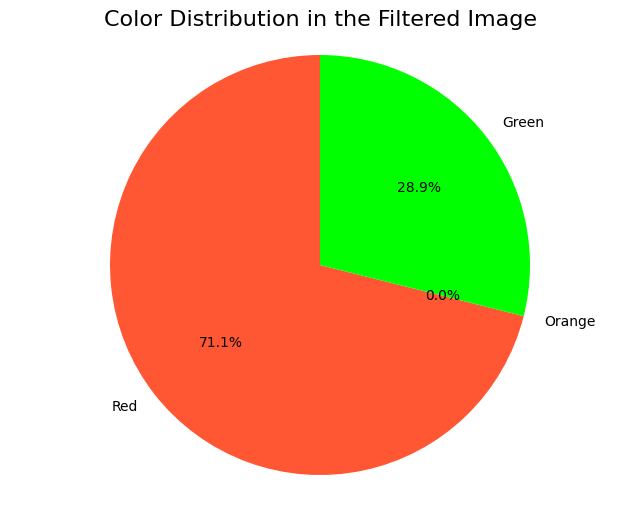

In [104]:
# Create a pie chart
labels = ['Red', 'Orange', 'Green']
percentages = [red_percentage, orange_percentage, green_percentage]
colors = ['#FF5733', '#FFA500', '#00FF00']

plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Color Distribution in the Filtered Image', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

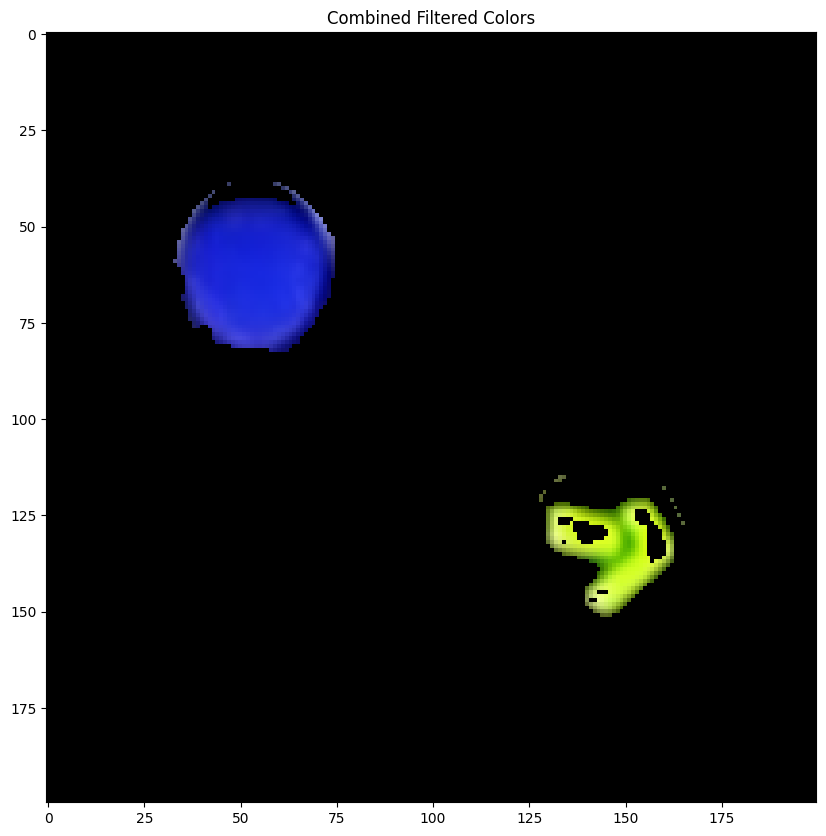

In [79]:
# Combine all the filtered images into one image
combined_image = cv2.bitwise_or(filtered_red, filtered_orange)
combined_image = cv2.bitwise_or(combined_image, filtered_green)

# Display the combined image
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title('Combined Filtered Colors')
plt.show()
